In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

### NOTE TO GRADER

Our datasets were huge, we are not sure how to give them to you. We left the outputs in the last commit. If you need the datasets, reach out to Jonah Harmon, and he can give you the Box link to download the ZIP files.

In [2]:
# df_b_make_csv = pd.read_json('core/goodreads_reviews_raw.json', lines=True)
# df_b_make_csv.to_csv('core/goodreads_reviews_complete.csv')
# df_b = df_books.sample(frac=0.5, random_state=42)
# df_b.to_csv('core/goodreads_reviews_halved.csv')

df_b = pd.read_csv('core/goodreads_reviews_complete.csv')
# df_b = pd.read_csv('core/goodreads_reviews_halved.csv')
df_b.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


In [3]:
# folder_path = 'core/dataset/'
# csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
# dfs = []
# for file in csv_files:
#     file_path = os.path.join(folder_path, file)
#     df = pd.read_csv(file_path)
#     df['movie_title'] = file.split('.csv')[0]
#     dfs.append(df)
# df_m = pd.concat(dfs, ignore_index=True)
# df_m.to_csv('core/IMDB_reviews_complete.csv')
# df_m = df_movies.sample(frac=0.5, random_state=42)
# df_m.to_csv('core/IMDB_reviews_halved.csv')

df_m = pd.read_csv('core/IMDB_reviews_complete.csv')
# df_m = pd.read_csv('core/IMDB_reviews_halved.csv')
df_m.head()

,Unnamed: 0,username,rating,helpful,total,date,title,review,movie_title
0,0,Imme-van-Gorp,7,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 Cloverfield Lane 2016
1,1,sonofocelot-1,5,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 Cloverfield Lane 2016
2,2,mhodaee,5,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 Cloverfield Lane 2016
3,3,fil-nik09,5,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",10 Cloverfield Lane 2016
4,4,DVR_Brale,7,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 Cloverfield Lane 2016


### Negative - Neutral - Positive

In [4]:
df_books = df_b.dropna(subset=['review_text'])
df_books = df_books[df_books['rating'] != 0]
df_books['sentiment'] = df_books['rating'].apply(lambda x: 0 if x <= 2 else (1 if x == 3 else 2))
df_books.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,sentiment
0,0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,2
1,1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,1
2,2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,1
4,4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,2
5,5,8842281e1d1347389f2ab93d60773d4d,19398490,ea4a220b10e6b5c796dae0e3b970aff1,4,A beautiful story. It is rare to encounter a b...,Sun Jan 03 21:20:46 -0800 2016,Tue Sep 20 23:30:15 -0700 2016,Tue Sep 13 11:51:51 -0700 2016,Sat Aug 20 07:03:03 -0700 2016,35,5,2


In [5]:
df_movies = df_m.dropna(subset=['rating', 'review'])
df_movies['rating'] = pd.to_numeric(df_movies['rating'], errors='coerce')
df_movies['sentiment'] = df_movies['rating'].apply(lambda x: 0 if x <= 3 else (1 if 4 <= x <= 6 else 2))
df_movies.head()


,Unnamed: 0,username,rating,helpful,total,date,title,review,movie_title,sentiment
0,0,Imme-van-Gorp,7.0,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 Cloverfield Lane 2016,2
1,1,sonofocelot-1,5.0,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 Cloverfield Lane 2016,1
2,2,mhodaee,5.0,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 Cloverfield Lane 2016,1
3,3,fil-nik09,5.0,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",10 Cloverfield Lane 2016,1
4,4,DVR_Brale,7.0,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 Cloverfield Lane 2016,2


In [6]:
X_books = df_books['review_text']
y_books = df_books['sentiment']

X_train_books, X_test_books, y_train_books, y_test_books = train_test_split(X_books, y_books, test_size=0.2)

count_vect_books = CountVectorizer()
X_train_counts_books = count_vect_books.fit_transform(X_train_books)
X_test_counts_books = count_vect_books.transform(X_test_books)

classifier_books = MultinomialNB()
classifier_books.fit(X_train_counts_books, y_train_books)
y_pred_books = classifier_books.predict(X_test_counts_books)
precision_books, recall_books, fscore_books, support_books = precision_recall_fscore_support(y_test_books, y_pred_books)

print("Precision:", precision_books)
print("Recall:", recall_books)
print("F1 Score:", fscore_books)

Precision: [0.56306909 0.41990836 0.84953138]
Recall: [0.53722572 0.52303876 0.78856505]
F1 Score: [0.54984391 0.46583385 0.8179137 ]


In [7]:
X_movies = df_movies['review']
y_movies = df_movies['sentiment']

X_train_movies, X_test_movies, y_train_movies, y_test_movies = train_test_split(X_movies, y_movies, test_size=0.2)

count_vect_movies = CountVectorizer()
X_train_counts_movies = count_vect_movies.fit_transform(X_train_movies)
X_test_counts_movies = count_vect_movies.transform(X_test_movies)

classifier_movies = MultinomialNB()
classifier_movies.fit(X_train_counts_movies, y_train_movies)
y_pred_movies = classifier_movies.predict(X_test_counts_movies)
precision_movies, recall_movies, fscore_movies, support_movies = precision_recall_fscore_support(y_test_movies, y_pred_movies)

print("Precision:", precision_movies)
print("Recall:", recall_movies)
print("F1 Score:", fscore_movies)

Precision: [0.46951249 0.38703748 0.91136619]
Recall: [0.7501459  0.41502409 0.79270947]
F1 Score: [0.57754347 0.40054251 0.84790673]


In [8]:
df_books.shape[0]

1330981

In [9]:
df_movies.shape[0]

931565

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

Text(113.9222222222222, 0.5, 'predicted label')

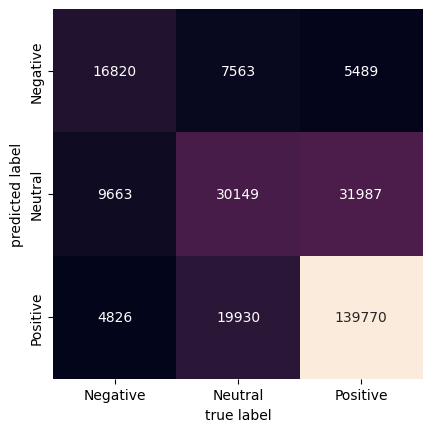

In [11]:
mat_books = confusion_matrix(y_test_books, y_pred_books)

target_names = ['Negative', 'Neutral','Positive']
sns.heatmap(mat_books.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

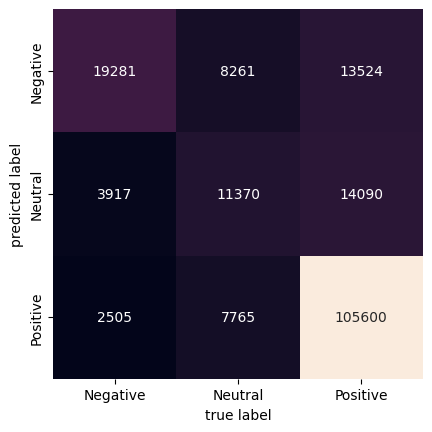

In [12]:
mat_movies = confusion_matrix(y_test_movies, y_pred_movies)

target_names = ['Negative', 'Neutral','Positive']
sns.heatmap(mat_movies.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

### Negative - Positive

In [13]:
df_books = df_b.dropna(subset=['review_text'])
df_books = df_books[df_books['rating'] != 0]
df_books['sentiment'] = df_books['rating'].apply(lambda x: 0 if x < 4 else 1)
df_books.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,sentiment
0,0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,1
1,1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,0
2,2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,0
4,4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1,1
5,5,8842281e1d1347389f2ab93d60773d4d,19398490,ea4a220b10e6b5c796dae0e3b970aff1,4,A beautiful story. It is rare to encounter a b...,Sun Jan 03 21:20:46 -0800 2016,Tue Sep 20 23:30:15 -0700 2016,Tue Sep 13 11:51:51 -0700 2016,Sat Aug 20 07:03:03 -0700 2016,35,5,1


#### Movie split 0-5 = Negative, 6-10 = Positive

In [14]:
df_movies = df_m.dropna(subset=['rating', 'review'])
df_movies['rating'] = pd.to_numeric(df_movies['rating'], errors='coerce')
df_movies['sentiment'] = df_movies['rating'].apply(lambda x: 0 if x <= 5 else 1)
df_movies.head()

,Unnamed: 0,username,rating,helpful,total,date,title,review,movie_title,sentiment
0,0,Imme-van-Gorp,7.0,102,123,30 January 2019,Unfortunately the ending ruined an otherwise ...,This movie is full of suspense. It makes you g...,10 Cloverfield Lane 2016,1
1,1,sonofocelot-1,5.0,385,500,10 May 2016,...oh dear Abrams. Again.\n,I'll leave this review fairly concise. <br/><b...,10 Cloverfield Lane 2016,0
2,2,mhodaee,5.0,110,143,4 August 2017,"Fantastic, gripping, thoroughly enjoyable, un...",I give the 5/10 out of the credit I owe to the...,10 Cloverfield Lane 2016,0
3,3,fil-nik09,5.0,73,100,5 October 2016,Hmmm...\n,"First of all, I must say that I was expecting ...",10 Cloverfield Lane 2016,0
4,4,DVR_Brale,7.0,42,56,27 July 2016,Slow building & plot alternating claustrophob...,I've always loved movies with strong atmospher...,10 Cloverfield Lane 2016,1


In [15]:
X_books = df_books['review_text']
y_books = df_books['sentiment']

X_train_books, X_test_books, y_train_books, y_test_books = train_test_split(X_books, y_books, test_size=0.2)

count_vect_books = CountVectorizer()
X_train_counts_books = count_vect_books.fit_transform(X_train_books)
X_test_counts_books = count_vect_books.transform(X_test_books)

classifier_books = MultinomialNB()
classifier_books.fit(X_train_counts_books, y_train_books)
y_pred_books = classifier_books.predict(X_test_counts_books)
precision_books, recall_books, fscore_books, support_books = precision_recall_fscore_support(y_test_books, y_pred_books)

print("Precision:", precision_books)
print("Recall:", recall_books)
print("F1 Score:", fscore_books)

Precision: [0.64431232 0.85361068]
Recall: [0.72773111 0.798057  ]
F1 Score: [0.68348583 0.82489957]


In [16]:
X_movies = df_movies['review']
y_movies = df_movies['sentiment']

X_train_movies, X_test_movies, y_train_movies, y_test_movies = train_test_split(X_movies, y_movies, test_size=0.2)

count_vect_movies = CountVectorizer()
X_train_counts_movies = count_vect_movies.fit_transform(X_train_movies)
X_test_counts_movies = count_vect_movies.transform(X_test_movies)

classifier_movies = MultinomialNB()
classifier_movies.fit(X_train_counts_movies, y_train_movies)
y_pred_movies = classifier_movies.predict(X_test_counts_movies)
precision_movies, recall_movies, fscore_movies, support_movies = precision_recall_fscore_support(y_test_movies, y_pred_movies)

print("Precision:", precision_movies)
print("Recall:", recall_movies)
print("F1 Score:", fscore_movies)

Precision: [0.55334128 0.93671941]
Recall: [0.80736229 0.8139713 ]
F1 Score: [0.65664101 0.87104217]


Text(113.9222222222222, 0.5, 'predicted label')

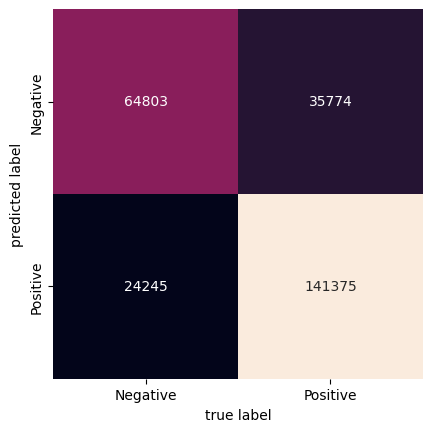

In [17]:
mat_books = confusion_matrix(y_test_books, y_pred_books)

target_names = ['Negative','Positive']
sns.heatmap(mat_books.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Text(113.9222222222222, 0.5, 'predicted label')

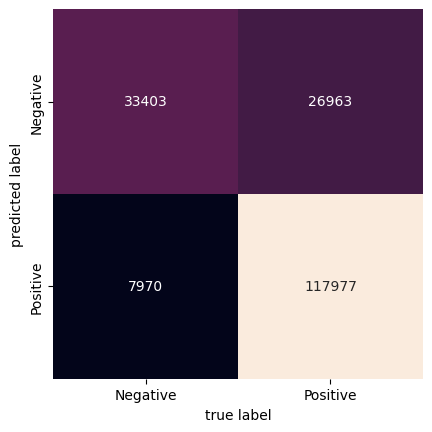

In [18]:
mat_movies = confusion_matrix(y_test_movies, y_pred_movies)

target_names = ['Negative','Positive']
sns.heatmap(mat_movies.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

#### Movie Split 0-6 = Negative, 7-10 = Positive

In [19]:

df_movies['sentiment'] = df_movies['rating'].apply(lambda x: 0 if x <= 6 else 1)
X_movies = df_movies['review']
y_movies = df_movies['sentiment']

X_train_movies, X_test_movies, y_train_movies, y_test_movies = train_test_split(X_movies, y_movies, test_size=0.2)

count_vect_movies = CountVectorizer()
X_train_counts_movies = count_vect_movies.fit_transform(X_train_movies)
X_test_counts_movies = count_vect_movies.transform(X_test_movies)

classifier_movies = MultinomialNB()
classifier_movies.fit(X_train_counts_movies, y_train_movies)
y_pred_movies = classifier_movies.predict(X_test_counts_movies)
precision_movies, recall_movies, fscore_movies, support_movies = precision_recall_fscore_support(y_test_movies, y_pred_movies)

print("Precision:", precision_movies)
print("Recall:", recall_movies)
print("F1 Score:", fscore_movies)


Precision: [0.61697819 0.908024  ]
Recall: [0.79645685 0.80253117]
F1 Score: [0.69532238 0.85202462]


Text(113.9222222222222, 0.5, 'predicted label')

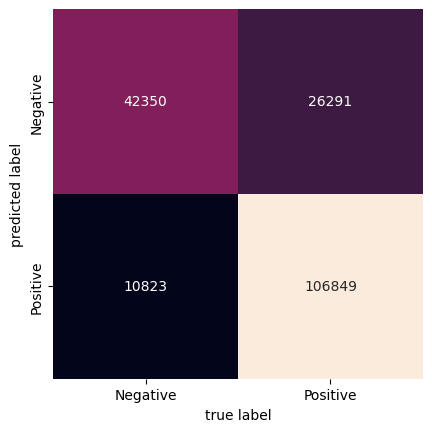

In [20]:
mat_movies = confusion_matrix(y_test_movies, y_pred_movies)

target_names = ['Negative','Positive']
sns.heatmap(mat_movies.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

median: 4.0
mean: 3.6850786592193367


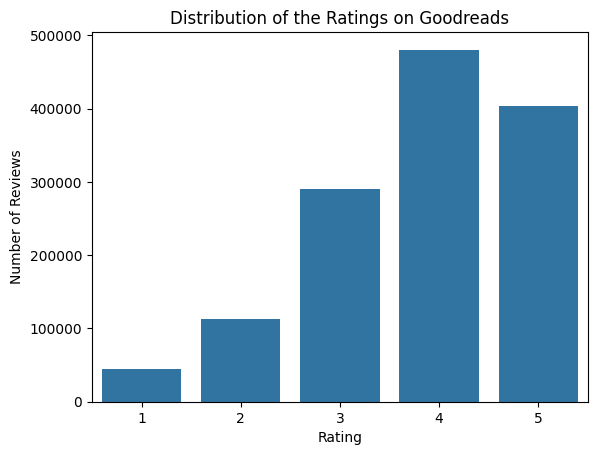

In [21]:
ax = sns.countplot(x='rating', data=df_books)

plt.title('Distribution of the Ratings on Goodreads')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')


print('median: {}'.format(df_b.rating.median()))
print('mean: {}'.format(df_b.rating.mean()))

In [22]:
df_movies = df_movies.dropna()
df_movies = df_movies.drop(df_movies[df_movies['rating'] == 'Null'].index)
df_movies['rating'] = df_movies.rating.astype('float')

median: 8.0
mean: 7.178145815830982


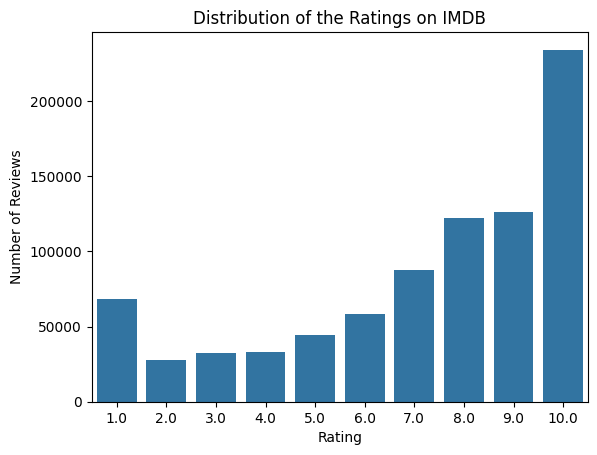

In [23]:
ax = sns.countplot(data=df_movies, x='rating')

plt.title('Distribution of the Ratings on IMDB')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')


print('median: {}'.format(df_movies.rating.median()))
print('mean: {}'.format(df_movies.rating.mean()))

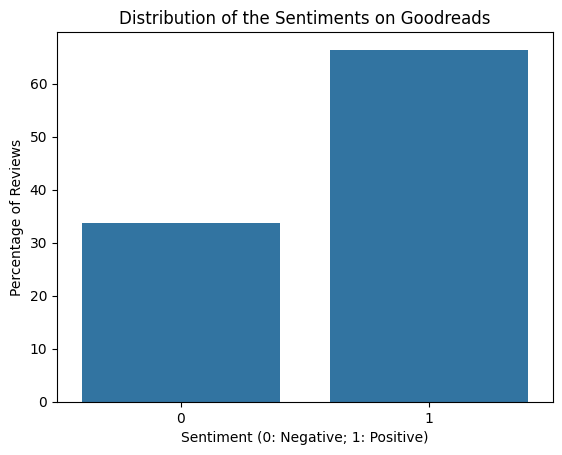

In [24]:
ax = sns.countplot(x='sentiment', data=df_books, stat='percent')

plt.title('Distribution of the Sentiments on Goodreads')
plt.xlabel('Sentiment (0: Negative; 1: Positive)')
plt.ylabel('Percentage of Reviews')

print()

Text(0, 0.5, 'Percentage of Reviews')

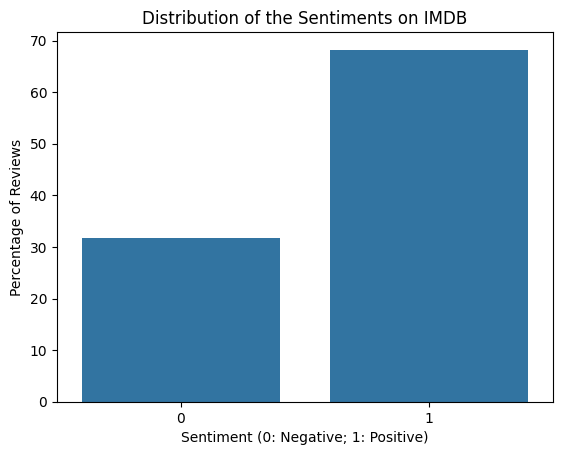

In [25]:
ax = sns.countplot(data=df_movies, x='sentiment', stat='percent')

plt.title('Distribution of the Sentiments on IMDB')
plt.xlabel('Sentiment (0: Negative; 1: Positive)')
plt.ylabel('Percentage of Reviews')